# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">introduction </span>

# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">1. Importing basic libraries </span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">2. Reading Files </span>

In [2]:
import pandas as pd

# Define file paths
file_paths = [
    r"C:\Users\josel\OneDrive\Documents\GitHub\House-pricing-analysis\testing_data_transformed.parquet",
    r"C:\Users\josel\OneDrive\Documents\GitHub\House-pricing-analysis\training_data_transformed.parquet",
    r"C:\Users\josel\OneDrive\Documents\GitHub\House-pricing-analysis\validating_data_transformed.parquet"
]

# Read each parquet file separately
testing_df = pd.read_parquet(file_paths[0])
training_df = pd.read_parquet(file_paths[1])
validating_df = pd.read_parquet(file_paths[2])




# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">3. Preparing dataset </span>

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 3.1 Defining features and target
</span>


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Note:**</span>

- Before training a model, the target variable (y), which is the price (koopPrijs), must be separated from the features set (X). 


In [3]:
# Define the target column name
target_column = 'koopPrijs'  # The target variable representing property price

# Split the training data
X_train = training_df.drop(columns=[target_column], errors='ignore')
y_train = training_df[target_column] if target_column in training_df.columns else None

# Split the validation data
X_val =validating_df.drop(columns=[target_column], errors='ignore')
y_val = validating_df[target_column] if target_column in validating_df.columns else None

# Split the testing data
X_test = testing_df.drop(columns=[target_column], errors='ignore')
y_test = testing_df[target_column] if target_column in testing_df.columns else None

# Verify if target column exists in all datasets
print(f"Training target defined: {y_train is not None}")
print(f"Validation target defined: {y_val is not None}")
print(f"Testing target defined: {y_test is not None}")


Training target defined: True
Validation target defined: True
Testing target defined: True


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 3.2 Scaling the dataset 
</span>


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train is your feature dataframe
X_train.describe().transpose()[["min", "max"]]


,min,max
bouwjaar,-1.011735e+01,7.146064e+01
indTuin,0.000000e+00,1.000000e+00
perceelOppervlakte,-1.047605e+01,2.992122e+00
aantalKamers,1.000000e+00,3.600000e+01
aantalBadkamers,-6.591949e-17,1.151856e-15
...,...,...
title_emb_380,-6.391936e-01,7.500637e-01
title_emb_381,-8.815891e-01,6.855205e-01
title_emb_382,-9.875217e-01,6.297647e-01
title_emb_383,-4.481137e-01,6.685885e-01


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 3.3 Verifying the dataset proportions
</span>


In [6]:
import pandas as pd

# Create a dictionary to store dataset shapes
data_shapes = {
    "X_train": X_train.shape,
    "y_train": y_train.shape,
    "X_val": X_val.shape,
    "y_val": y_val.shape,
    "X_test": X_test.shape,
    "y_test": y_test.shape
}

# Convert to a DataFrame for better visualization
df_shapes = pd.DataFrame(data_shapes, index=["Rows", "Columns"]).transpose()

# Display the DataFrame
print(df_shapes)


           Rows  Columns
X_train  119797      417
y_train  119797   119797
X_val     39933      417
y_val     39933    39933
X_test    39933      417
y_test    39933    39933


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 3.4 fixing columns names first
</span>
 


In [7]:
import pandas as pd

# Assume original feature names are available from an earlier step
feature_names = [f'feature_{i}' for i in range(X_train_scaled.shape[1])]  # Placeholder if names are unknown

# Convert NumPy arrays to DataFrames with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

# Clean column names
X_train_scaled.columns = X_train_scaled.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)
X_val_scaled.columns = X_val_scaled.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)
X_test_scaled.columns = X_test_scaled.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)


In the first trial, there were some issues with the titles, therefore, these will be corrected before tuning. The error "feature_names must be string, and may not contain [, ] or <" occurs because some column names in your X_train dataset contain invalid characters like brackets ([ ]) or the less-than symbol (<). XGBoost does not accept such column names. 

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 3.4 combining the dataset
</span>
 


In [8]:
# Combine training and validation datasets
X_train_val = np.vstack([X_train_scaled, X_val_scaled])
y_train_val = np.hstack([y_train, y_val])

# Print the shapes to verify
print(f"X_train_val shape: {X_train_val.shape}")
print(f"y_train_val shape: {y_train_val.shape}")

X_train_val shape: (159730, 417)
y_train_val shape: (159730,)


# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">4. Baseline Model Linear Regression </span>

The baseline model is used as a point of reference to evaluate the performance of more complex models, like ANN and random forest regressor. It helps in comparing whether the other models are adding value or if a basic approach performs just as well.  

**Note**: the conclusion of the performed model can be read in section 4.6.

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 4.1 Importing Libraries
</span>


In [135]:
# Importing the basic libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 4.2 Singular Value Decomposition
</span>


As **Linear Regression** is affected by high-dimensional data, this will be reduced throuhg SVD which is a technique to reduce dimensions while preserving important data within teh chosen components. By transforming correlated features into uncorrelated components, SVD stabilizes coefficient estimates. SVD can help also tackle existing multicollinearity, and prevent overfitting, as it reduce it to the most important features so that the model can learn patterns intead of noise,in order to make better generalization on the unseen data. 


### 4.2.1 Analyzing which number of components is the best

A test will be performed first to check how many components is need to preserve a variance of 90%.

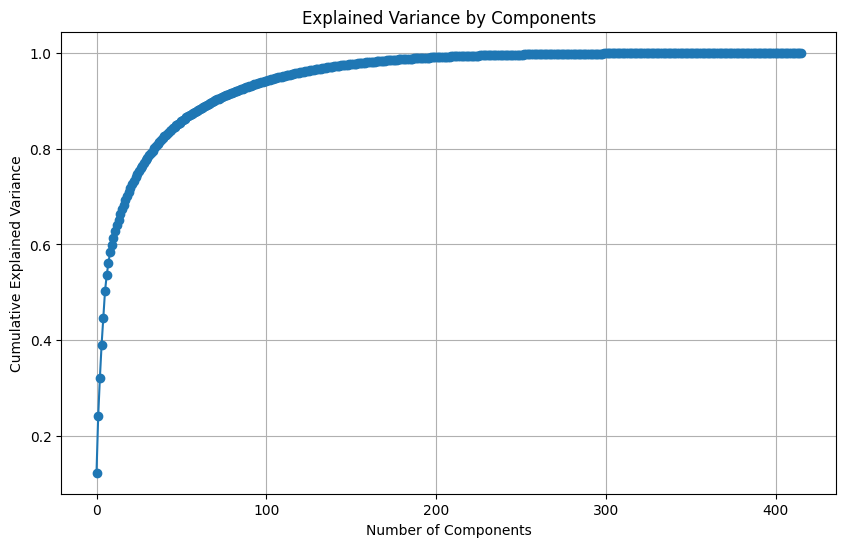

Number of components capturing 98% variance: 161


In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Fit SVD on the scaled training data only
svd = TruncatedSVD(n_components=min(X_train.shape[1], X_train.shape[0]) - 1, n_iter=20, random_state=42)
svd.fit(X_train)  # Fit on training data only

# Transform the datasets
X_train_transformed = svd.transform(X_train)
X_val_transformed = svd.transform(X_val)
X_test_transformed = svd.transform(X_test)

# Calculate cumulative variance explained by the components (on training data)
cumulative_variance = np.cumsum(svd.explained_variance_ratio_)

# Plot the cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

# Determine the number of components for desired explained variance, e.g., 98%
n_components = np.where(cumulative_variance >= 0.98)[0][0] + 1
print(f"Number of components capturing 98% variance: {n_components}")



### 4.2.2 Performing SVD on the scaled dataset

In [137]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Ensure input data is in NumPy array format
X_train_np = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_val_np = X_val.to_numpy() if isinstance(X_val, pd.DataFrame) else X_val
X_test_np = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Combine train & validation for SVD fitting (no test set to avoid data leakage)
X_svd_fit = np.vstack([X_train_np, X_val_np])

# Fit SVD to capture 98% variance
svd_full = TruncatedSVD(n_components=min(X_svd_fit.shape) - 1, n_iter=20, random_state=42)
svd_full.fit(X_svd_fit)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(svd_full.explained_variance_ratio_)

# Find the number of components capturing at least 98% variance
n_components_98 = np.argmax(cumulative_variance >= 0.98) + 1  # First index where condition is met
print(f"✅ Number of components capturing 98% variance: {n_components_98}")

# Apply SVD with the optimal number of components
svd = TruncatedSVD(n_components=n_components_98, n_iter=20, random_state=42)
svd.fit(X_svd_fit)  # Fit only on train+val

# Transform datasets using trained SVD
X_train_svd = svd.transform(X_train_np)
X_val_svd = svd.transform(X_val_np)
X_test_svd = svd.transform(X_test_np)

# Convert transformed data into DataFrames with meaningful column names
svd_features = [f"svd_component_{i}" for i in range(n_components_98)]
X_train_svd_df = pd.DataFrame(X_train_svd, columns=svd_features)
X_val_svd_df = pd.DataFrame(X_val_svd, columns=svd_features)
X_test_svd_df = pd.DataFrame(X_test_svd, columns=svd_features)

# Verify shape consistency
print(f"Train shape: {X_train_svd_df.shape}, Validation shape: {X_val_svd_df.shape}, Test shape: {X_test_svd_df.shape}")

# Ensure all datasets have the same number of features
assert X_train_svd_df.shape[1] == X_val_svd_df.shape[1] == X_test_svd_df.shape[1], "❌ Feature mismatch detected!"

print("✅ SVD applied successfully with reduced dimensions.")

# -----------------------------------------------------------------------------
# 🔹 **Apply MinMax Scaling After SVD**
# -----------------------------------------------------------------------------

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data only
scaler.fit(X_train_svd_df)

# Scale training, validation, and test data
X_train_svd_scaled = scaler.transform(X_train_svd_df)
X_val_svd_scaled = scaler.transform(X_val_svd_df)
X_test_svd_scaled = scaler.transform(X_test_svd_df)

# Convert scaled data back into DataFrames
X_train_final_svd = pd.DataFrame(X_train_svd_scaled, columns=svd_features)
X_val_final_svd = pd.DataFrame(X_val_svd_scaled, columns=svd_features)
X_test_final_svd = pd.DataFrame(X_test_svd_scaled, columns=svd_features)

print("✅ SVD features successfully scaled with MinMaxScaler.")




✅ Number of components capturing 98% variance: 161
Train shape: (119797, 161), Validation shape: (39933, 161), Test shape: (39933, 161)
✅ SVD applied successfully with reduced dimensions.
✅ SVD features successfully scaled with MinMaxScaler.


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 4.3 Fitting the model on the transformed dataset, without svd
</span>


To ensure a fair comparison of the Ridge and Linear Regression model the train-test split will be the same for both models. 

### 4.3.1 Splitting the data for ridge and linear regression

→ Merging the data first:

In [138]:
X_train_final = np.vstack((X_train_scaled, X_val_scaled, X_test_scaled))
y_train_final = np.hstack((y_train, y_val, y_test))

→ Splitting the dataset for linear regression: 

In [139]:
from sklearn.model_selection import train_test_split

# Split entire dataset once (Same for both Ridge & Linear Regression)
X_trainlr, X_testlr, y_trainlr, y_testlr = train_test_split(X_train_final, y_train_final, test_size=0.1, random_state=46)



→ further splitting the dataset for ridge tuning:

In [140]:
# Further split Ridge's training data into train & validation (Same random_state)
X_train_ridge, X_val_ridge, y_train_ridge, y_val_ridge = train_test_split(X_train_final, y_train_final, test_size=0.1, random_state=46)


### 4.3.2 Fitting the model for Linear Regression

As linear regression doe snot require tuning the model will be tested on the train and test data only. Therefore, the train and validation set will be merged. 

In [141]:
# Train Linear Regression (No validation needed)
model_linear = LinearRegression()
model_linear.fit(X_trainlr, y_trainlr)

LinearRegression()

### 4.3.2 Tuning and fitting the Ridge model

Ridge regression model does require to be tuned, as the best alpha must be found to help enhace the accuracy, while improving the model's performance by ensuring/ balancing it doesn't overfits or underfits.

→ Tuning tuning teh ridge model using gridsearch:

In [142]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split


# Step 2: Define Ridge tuning parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Step 3: Tune Ridge using Train Data (Validation is used internally in CV)
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')  # CV = 5 uses 80% train, 20% val in folds
grid_search.fit(X_train_ridge, y_train_ridge)  # Uses cross-validation internally

# Step 4: Get Best Alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha for Ridge: {best_alpha}")


Best Alpha for Ridge: 0.1


Best Alpha for Ridge: 1, this will be manually put in the next code for training the ridge model.

→ Training Ridge on merged Train + Validation set using best alpha

In [143]:
#train ridge regression on the merged x_trainlr dataset
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_trainlr, y_trainlr)


Ridge(alpha=1)

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 4.4 Model Evaluation on the dataset without SVD
</span>


In [144]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# Predict and compare both models
y_pred_linear = model_linear.predict(X_testlr)
y_pred_ridge = ridge_model.predict(X_testlr)

# Function to calculate multiple metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)  # RMSE
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error (MAPE)
    evs = explained_variance_score(y_true, y_pred)  # Explained Variance Score
    
    print(f"\n**{model_name} Performance Metrics:**")
    print(f"🔹 R² Score: {r2:.4f}")
    print(f"🔹 Explained Variance Score (EVS): {evs:.4f}")
    print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
    print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
    print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"🔹 Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print("-" * 50)

# Evaluate models
evaluate_model(y_testlr, y_pred_linear, "Linear Regression")
evaluate_model(y_testlr, y_pred_ridge, "Ridge Regression")



**Linear Regression Performance Metrics:**
🔹 R² Score: 0.6358
🔹 Explained Variance Score (EVS): 0.6358
🔹 Mean Absolute Error (MAE): 0.46
🔹 Mean Squared Error (MSE): 0.36
🔹 Root Mean Squared Error (RMSE): 0.60
🔹 Mean Absolute Percentage Error (MAPE): 889.41%
--------------------------------------------------

**Ridge Regression Performance Metrics:**
🔹 R² Score: 0.6354
🔹 Explained Variance Score (EVS): 0.6354
🔹 Mean Absolute Error (MAE): 0.46
🔹 Mean Squared Error (MSE): 0.36
🔹 Root Mean Squared Error (RMSE): 0.60
🔹 Mean Absolute Percentage Error (MAPE): 898.46%
--------------------------------------------------


c:\Users\josel\anaconda3\envs\AI_RESIT\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\josel\anaconda3\envs\AI_RESIT\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression Performance Metrics:
🔹 R² Score: -0.3909
🔹 Explained Variance Score (EVS): -0.3909
🔹 Mean Absolute Error (MAE): 0.95
🔹 Mean Squared Error (MSE): 1.39
🔹 Root Mean Squared Error (RMSE): 1.18
🔹 Mean Absolute Percentage Error (MAPE): 280.22%


Ridge Regression Performance Metrics:
🔹 R² Score: -0.3909
🔹 Explained Variance Score (EVS): -0.3909
🔹 Mean Absolute Error (MAE): 0.95
🔹 Mean Squared Error (MSE): 1.39
🔹 Root Mean Squared Error (RMSE): 1.18
🔹 Mean Absolute Percentage Error (MAPE): 280.22%


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 4.5 Model fitting & evaluation on the dataset with SVD
</span>


### 4.5.1 Splitting the data for ridge and linear regression

In [ ]:

#→ Merging the data first:
X_train_final_ncomp = np.vstack((X_train_final_svd, X_val_final_svd, X_test_final_svd))
y_train_final_ncomp = np.hstack((y_train, y_val, y_test))

→ Splitting the dataset for linear regression: 

In [ ]:
from sklearn.model_selection import train_test_split

# Split entire dataset once (Same for both Ridge & Linear Regression)
X_train_ncomp, X_test_ncomp, y_train_ncomp, y_test_ncomp = train_test_split(X_train_final_ncomp, y_train_final_ncomp, test_size=0.1, random_state=46)


### 4.5.2 Fitting both Ridge and Linear regression models

In [112]:

# Train Linear Regression (No validation needed)
model_linear = LinearRegression()
model_linear.fit(X_train_final_ncomp, y_train_final_ncomp)

LinearRegression()

In [113]:
#train ridge regression on the merged x_trainlr dataset
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train_final_ncomp, y_train_final_ncomp)

Ridge(alpha=1)

### 4.5.3 Evaluating both Ridge and Linear regression models 

In [133]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# Predict and compare both models
y_pred_linear = model_linear.predict(X_test_ncomp)
y_pred_ridge = ridge_model.predict(X_test_ncomp)

# Function to calculate multiple metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)  # RMSE
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error (MAPE)
    evs = explained_variance_score(y_true, y_pred)  # Explained Variance Score
    
    print(f"\n**{model_name} Performance Metrics (svd):**")
    print(f"🔹 R² Score: {r2:.4f}")
    print(f"🔹 Explained Variance Score (EVS): {evs:.4f}")
    print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
    print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
    print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"🔹 Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print("-" * 50)

# Evaluate models
evaluate_model(y_test_ncomp, y_pred_linear, "Linear Regression")
evaluate_model(y_test_ncomp, y_pred_ridge, "Ridge Regression")



**Linear Regression Performance Metrics (svd):**
🔹 R² Score: 0.6209
🔹 Explained Variance Score (EVS): 0.6209
🔹 Mean Absolute Error (MAE): 0.47
🔹 Mean Squared Error (MSE): 0.38
🔹 Root Mean Squared Error (RMSE): 0.61
🔹 Mean Absolute Percentage Error (MAPE): 909.03%
--------------------------------------------------

**Ridge Regression Performance Metrics (svd):**
🔹 R² Score: 0.6208
🔹 Explained Variance Score (EVS): 0.6208
🔹 Mean Absolute Error (MAE): 0.47
🔹 Mean Squared Error (MSE): 0.38
🔹 Root Mean Squared Error (RMSE): 0.61
🔹 Mean Absolute Percentage Error (MAPE): 906.55%
--------------------------------------------------


c:\Users\josel\anaconda3\envs\AI_RESIT\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\josel\anaconda3\envs\AI_RESIT\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 4.6 Conclusion on the models performed with and without svd
</span>


### 4.6.1 Plotting the model tested on the scaled dataset

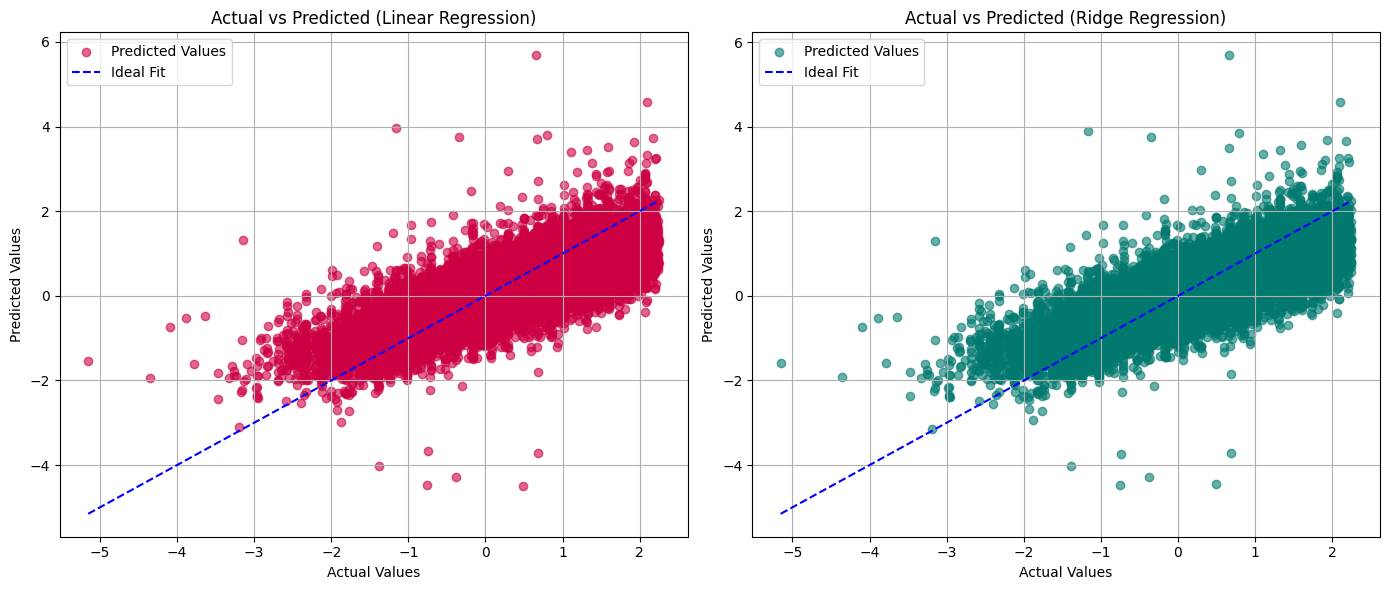

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure y_testlr and y_pred values exist and are consistent
assert len(y_testlr) == len(y_pred_linear) == len(y_pred_ridge), "Mismatch in sample sizes!"

# Plot Actual vs Predicted for Linear Regression and Ridge Regression models
plt.figure(figsize=(14, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_testlr, y_pred_linear, color='#CC0042', alpha=0.6, label='Predicted Values')
plt.plot([min(y_testlr), max(y_testlr)], [min(y_testlr), max(y_testlr)], color='blue', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Plot for Ridge Regression
plt.subplot(1, 2, 2)
plt.scatter(y_testlr, y_pred_ridge, color='#01796F', alpha=0.6, label='Predicted Values')
plt.plot([min(y_testlr), max(y_testlr)], [min(y_testlr), max(y_testlr)], color='blue', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


### 4.6.2 Plotting the model tested on the SVD transformed dataset

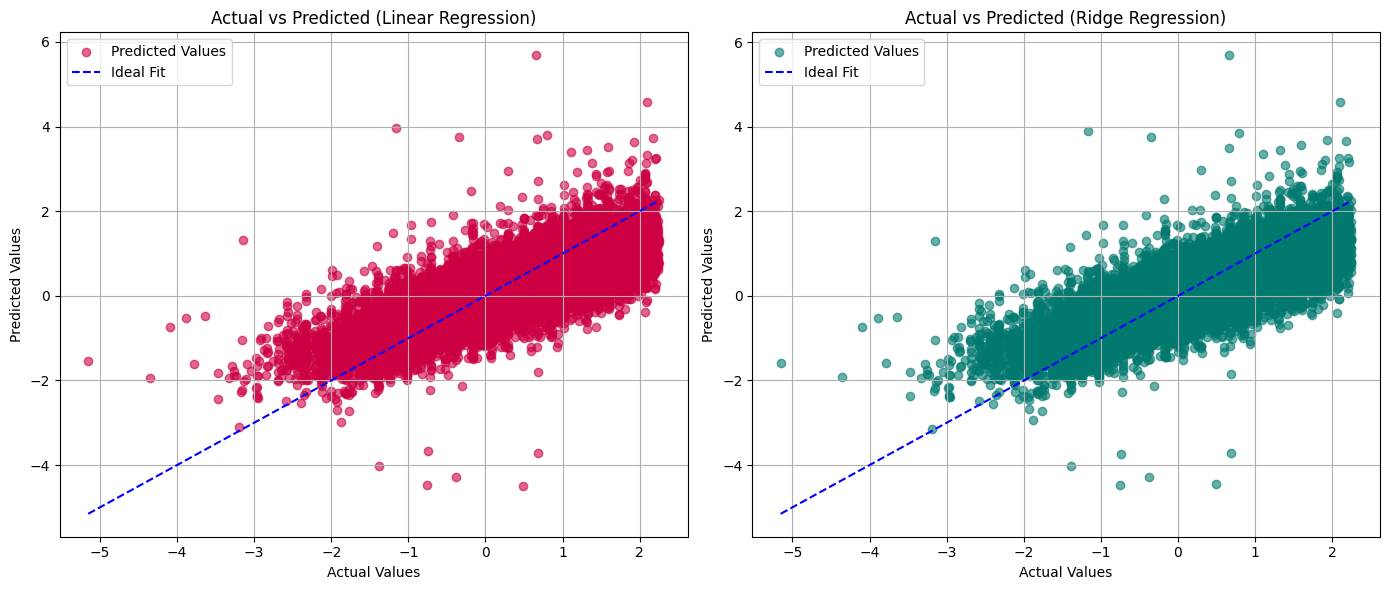

In [153]:
# Ensure y_test_ncomp and predicted values exist and are consistent
assert len(y_test_ncomp) == len(y_pred_linear) == len(y_pred_ridge), "Mismatch in sample sizes!"

# Plot Actual vs Predicted for Linear Regression and Ridge Regression models
plt.figure(figsize=(14, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test_ncomp, y_pred_linear, color='#CC0042', alpha=0.6, label='Predicted Values')
plt.plot([min(y_test_ncomp), max(y_test_ncomp)], [min(y_test_ncomp), max(y_test_ncomp)], color='blue', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Plot for Ridge Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test_ncomp, y_pred_ridge, color='#01796F', alpha=0.6, label='Predicted Values')
plt.plot([min(y_test_ncomp), max(y_test_ncomp)], [min(y_test_ncomp), max(y_test_ncomp)], color='blue', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


### 4.6.3 Analysis & Conclusion

<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">Comparison of Model Performance With and Without SVD</span>

| Metric                          | Linear Regression (SVD) | Ridge Regression (SVD) | Linear Regression (No SVD) | Ridge Regression (No SVD) |
|--------------------------------|-------------------------|-------------------------|---------------------------|---------------------------|
| **R² Score**                   | 0.6209                  | 0.6208                  | **0.6358**                 | **0.6354**                 |
| **Explained Variance Score (EVS)** | 0.6209                  | 0.6208                  | **0.6358**                 | **0.6354**                 |
| **Mean Absolute Error (MAE)**   | 0.47                    | 0.47                    | **0.46**                   | **0.46**                   |
| **Mean Squared Error (MSE)**    | 0.38                    | 0.38                    | **0.36**                   | **0.36**                   |
| **Root Mean Squared Error (RMSE)** | 0.61                  | 0.61                    | **0.60**                   | **0.60**                   |
| **Mean Absolute Percentage Error (MAPE)** | **909.03%**          | **906.55%**             | 889.41%                    | 898.46%                    |


To evaluate the performance, the R2 score will be compared. The difference between the model ran with svd and without is very small. However both models performed well, as an R2 above 0.5 is considered good.

| **R² Score**   | **Interpretation**        |
|---------------|------------------------|
| **0.70 – 1.00**  | Excellent   |
| **0.50 – 0.69**  | Good/Moderate  |
| **0.30 – 0.49**  | Weak   |
| **0.00 – 0.29**  | Poor   |
| **< 0.00**       | Useless   |


Furtehrmore, the MSE (Mean Squared Error), which measures the average squared difference between actual and predicted values, its low for both types of dataset meaning it has moderate error as a high MSE means larger prediction errors, which can indicate poor model fit.

# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">5. Random Forest Regressor </span>

 Random Forest for Regression
Model: RandomForestRegressor (from sklearn.ensemble)
Purpose: Predicts continuous values (e.g., house prices, stock market trends).
Example Use Case: Estimating real estate prices based on features like square footage, location, etc.

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;">5.1  Importing libraries needed for Random Forest Regressor
</span>


In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt




## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;">5.2 Tuning the model
</span>


<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">Description of the tuning method</span>

This code performs a grid search to optimize the hyperparameters of the `RandomForestRegressor` model using 5-fold cross-validatio. It systematically tests every combination of specified hyperparameters, running a total of **54 trials**, as it was previously test a trial of 20 yield a MSE score of approximately 0.4 therefore the trials were increased in order to increase the chances of finding better hyperparameters with a lower MSE score.

- **Hyperparameter Grid:**
This grid is a set of different values for each hyperparameter that the algorithm will test to find the best value.
  - **n_estimators:** [50, 100]  
  - **max_depth:** [5, 10, 15]  
  - **min_samples_split:** [5, 10, 20]  
  - **min_samples_leaf:** [3, 5, 10]  
  - **max_features:** [0.3]



In [117]:
import time
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Define optimized parameter grid
param_grid = {
    "n_estimators": [50, 100],  # Reduced trees
    "max_depth": [5, 10, 15],  # Shallower trees to prevent memorization
    "min_samples_split": [5, 10, 20],  # Prevent small splits
    "min_samples_leaf": [3, 5, 10],  # Prevent overfitting on tiny leaves
    "max_features": [0.3]  # Use 30% of features per split (prevents overfitting)
}

# Initialize best parameters
best_params = None
best_error = float("inf")

# Track total iterations
total_iterations = (
    len(param_grid["n_estimators"]) *
    len(param_grid["max_depth"]) *
    len(param_grid["min_samples_split"]) *
    len(param_grid["min_samples_leaf"]) *
    len(param_grid["max_features"])
)
iteration = 1

# Grid search with cross-validation
for n_estimators in param_grid["n_estimators"]:
    for max_depth in param_grid["max_depth"]:
        for min_samples_split in param_grid["min_samples_split"]:
            for min_samples_leaf in param_grid["min_samples_leaf"]:
                for max_features in param_grid["max_features"]:
                    
                    start_time = time.time()

                    # Initialize RandomForestRegressor
                    rf = RandomForestRegressor(
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        max_features=max_features,
                        bootstrap=True,  # Bootstrapping helps prevent overfitting
                        random_state=42,
                        n_jobs=-1
                    )

                    # Apply 5-Fold Cross-Validation
                    mse_scores = cross_val_score(rf, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=5)
                    mse_mean = -np.mean(mse_scores)  # Convert negative MSE to positive

                    # Check if it's the best model
                    if mse_mean < best_error:
                        best_error = mse_mean
                        best_params = {
                            "n_estimators": n_estimators,
                            "max_depth": max_depth,
                            "min_samples_split": min_samples_split,
                            "min_samples_leaf": min_samples_leaf,
                            "max_features": max_features
                        }

                    elapsed_time = time.time() - start_time
                    print(f"Iteration {iteration}/{total_iterations} → "
                          f"(n_estimators={n_estimators}, max_depth={max_depth}, "
                          f"min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, "
                          f"max_features={max_features}) | Mean CV MSE: {mse_mean:.4f} | Time: {elapsed_time:.2f}s")

                    iteration += 1

# Print final best parameters
print("\n✅ Best Parameters:", best_params)
print(f"✅ Lowest Mean Cross-Validation MSE: {best_error:.4f}")

# Train the best model on the full training set
rf_best = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
rf_best.fit(X_train_scaled, y_train)

# Predict on training and validation sets
y_train_pred = rf_best.predict(X_train_scaled)
y_val_pred = rf_best.predict(X_val_scaled)

# Compute MSE and R² Scores
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print final results
print("\n📊 **Final Model Performance**")
print(f"🔹 Training Loss (MSE): {train_mse:.4f}")
print(f"🔹 Validation Loss (MSE): {val_mse:.4f}")
print(f"🔹 Training R² Score: {train_r2:.4f}")
print(f"🔹 Validation R² Score: {val_r2:.4f}")


Iteration 1/54 → (n_estimators=50, max_depth=5, min_samples_split=5, min_samples_leaf=3, max_features=0.3) | Mean CV MSE: 0.4749 | Time: 96.22s
Iteration 2/54 → (n_estimators=50, max_depth=5, min_samples_split=5, min_samples_leaf=5, max_features=0.3) | Mean CV MSE: 0.4749 | Time: 97.10s
Iteration 3/54 → (n_estimators=50, max_depth=5, min_samples_split=5, min_samples_leaf=10, max_features=0.3) | Mean CV MSE: 0.4752 | Time: 94.25s
Iteration 4/54 → (n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=3, max_features=0.3) | Mean CV MSE: 0.4749 | Time: 91.59s
Iteration 5/54 → (n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features=0.3) | Mean CV MSE: 0.4749 | Time: 91.49s
Iteration 6/54 → (n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=10, max_features=0.3) | Mean CV MSE: 0.4752 | Time: 91.68s
Iteration 7/54 → (n_estimators=50, max_depth=5, min_samples_split=20, min_samples_leaf=3, max_features=0.3) | Mean CV MSE: 0.4752 |

### Saving the best params

the best parameters are saved due to time constraint, as running the gridsearch tuning took around 4 hours. Therefore, it will be saved and then used to fit the model to these best_params. 

In [118]:
import joblib

# Best hyperparameters
best_params = {
    'n_estimators': 100,
    'max_depth': 15,
    'min_samples_split': 5,
    'min_samples_leaf': 3,
    'max_features': 0.3
}

# Save path
save_path = r"C:\Users\josel\OneDrive\Documents\GitHub\randomforest_best_parameters.joblib"

# Save hyperparameters
joblib.dump(best_params, save_path)

print(f"Hyperparameters saved successfully at: {save_path}")


Hyperparameters saved successfully at: C:\Users\josel\OneDrive\Documents\GitHub\randomforest_best_parameters.joblib


In [161]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Load saved hyperparameters
load_path = r"C:\Users\josel\OneDrive\Documents\GitHub\randomforest_best_parameters.joblib"
best_hyperparameters_saved = joblib.load(load_path)


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.3 Fitting the model on train data & visualizing the loss
</span>


The model will be first trained on the training dataset only. This allows the model to learn fundamental patterns from a smaller dataset without excessive complexity. After the model will be fitted on the combined dataset (train + validation) which can help reduce variance by providing more examples, and improve generalization without overfitting.

### 5.3.1 Training the model on the train dataset

In [165]:
# Train final model using the best parameters
rf_best = RandomForestRegressor(**best_hyperparameters_saved, random_state=42, n_jobs=-1)
rf_best.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=15, max_features=0.3, min_samples_leaf=3,
                      min_samples_split=5, n_jobs=-1, random_state=42)

### 5.3.2 Visualizing the MSE loss 

Training Loss (MSE): 0.1485762485629434
Validation Loss (MSE): 0.26896115374001556
Training R² Score: 0.8514237514370566
Validation R² Score: 0.7310388462599844


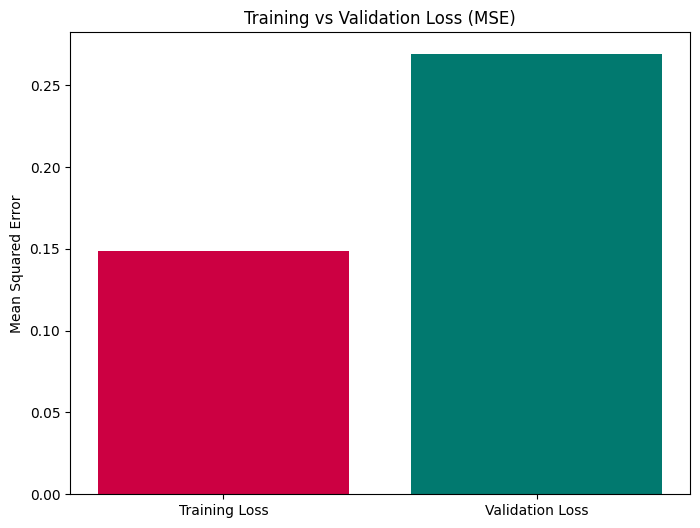

In [167]:
from sklearn.metrics import r2_score

# Calculate the predictions on the training and validation sets
y_train_pred_t = rf_best.predict(X_train_scaled)  # Predictions on the training set
y_val_pred_t = rf_best.predict(X_val_scaled)      # Predictions on the validation set

# Compute the mean squared error for training and validation sets
train_loss = mean_squared_error(y_train, y_train_pred_t)
val_loss = mean_squared_error(y_val, y_val_pred_t)

# Compute the R² scores for training and validation sets
train_r2 = r2_score(y_train, y_train_pred_t)
val_r2 = r2_score(y_val, y_val_pred_t)
# Print the MSE and R² scores
print("Training Loss (MSE):", train_loss)
print("Validation Loss (MSE):", val_loss)
print("Training R² Score:", train_r2)
print("Validation R² Score:", val_r2)
# Plot the losses
plt.figure(figsize=(8, 6))
plt.bar(["Training Loss", "Validation Loss"], [train_loss, val_loss], color=['#CC0042', '#01796F'])
plt.title("Training vs Validation Loss (MSE)")
plt.ylabel("Mean Squared Error")
plt.show()


<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;"> **Note:** </span>

The model performs well on training data, achieving a R² of 0.8583 and a MSE score od 0.1418 but generalizes slightly less accurate on the validation data (R² = 0.7352, MSE = 0.2616), which could indicate mild overfitting. However, its a further improvement as the first trial was an R2 of 0.3, which show that the tuning optimization worked. 

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.4 Fitting the model on merged data (validation + train) & visualisation
</span>


In this section the model will be fitted on the X_train_val and y_train_val, which is teh merged dataset of the train and validation data together. As the model was first trained on the training dataset to learn patterns. And now with the combined dataset the can learn from a larger  dataset, which can help the model in making better predictions or generalization while also reducing the risk of overfitting to the original training set. Also, by retraining the model, the model can benefit from additional insights present in the validation set, which can help the model to perform better.

### 5.4.1 Training the model on the train dataset

In [169]:
# Train final model using the best parameters
rf_best_final = RandomForestRegressor(**best_hyperparameters_saved, random_state=42, n_jobs=-1)
rf_best_final.fit(X_train_svd, y_train)


RandomForestRegressor(max_depth=15, max_features=0.3, min_samples_leaf=3,
                      min_samples_split=5, n_jobs=-1, random_state=42)

### 5.4.2 Visualizing the MSE loss 

Combined Training + Validation Loss (MSE): 0.1561306635533798
Test Loss (MSE): 0.2610028086887241
Combined Training + Validation MAE: 0.30171498431817356
Test MAE: 0.38451955121632986
Combined Training + Validation R² Score: 0.8438693364466202
Test R² Score: 0.738997191311276


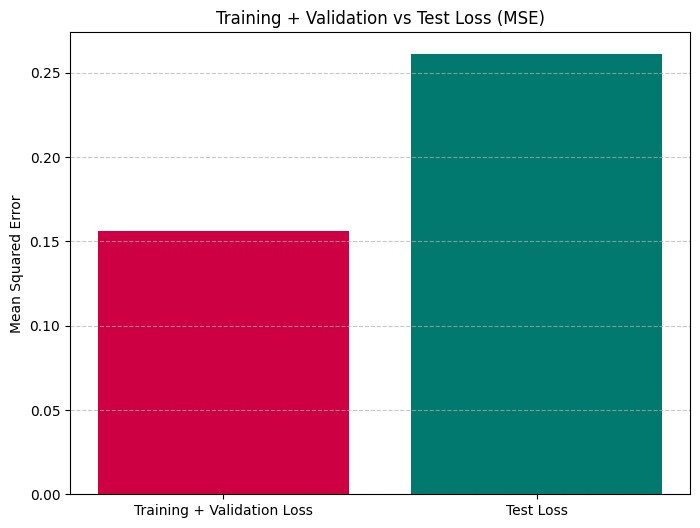

In [172]:
# source Ruta 

# Fit the final model on the combined dataset
rf_best_final.fit(X_train_val, y_train_val)

# Calculate the predictions on the combined training set and test set
y_train_val_pred = rf_best_final.predict(X_train_val)  # Predictions on the combined training set
y_test_pred_merged = rf_best_final.predict(X_test_scaled)   # Predictions on the test set

# Compute the mean squared error for the combined training and test sets
train_val_mse = mean_squared_error(y_train_val, y_train_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred_merged)

# Compute the MAE for the combined training and test sets
train_val_mae = mean_absolute_error(y_train_val, y_train_val_pred)
test_mae = mean_absolute_error(y_test, y_test_pred_merged)

# Compute the R² score for the combined training and test sets
train_val_r2 = r2_score(y_train_val, y_train_val_pred)
test_r2 = r2_score(y_test, y_test_pred_merged)

# Print the metrics
print("Combined Training + Validation Loss (MSE):", train_val_mse)
print("Test Loss (MSE):", test_mse)
print("Combined Training + Validation MAE:", train_val_mae)
print("Test MAE:", test_mae)
print("Combined Training + Validation R² Score:", train_val_r2)
print("Test R² Score:", test_r2)

# Plot only the MSE
plt.figure(figsize=(8, 6))
plt.bar(["Training + Validation Loss", "Test Loss"], [train_val_mse, test_mse], color=['#CC0042', '#01796F'])
plt.title("Training + Validation vs Test Loss (MSE)")
plt.ylabel("Mean Squared Error")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Assign values to variables for further use
test_mse_rf = test_mse
test_mae_rf = test_mae
test_r2_rf = test_r2


---
→ See discussion in the next section, namely **chapter 5.5**

---

### 5.4.3 Feature importance visualization

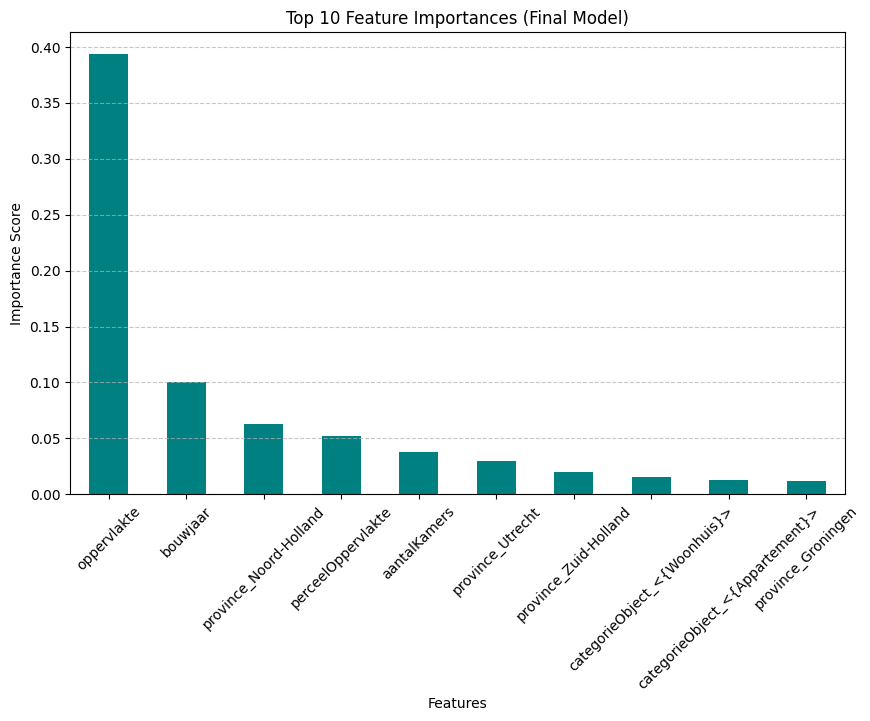

In [ ]:
#source datacamp (Shafi, 2024)

# Ensure X_train is defined before using its column names
if 'X_train' not in locals():
    raise NameError("X_train is not defined. Ensure it is assigned before running this script.")

# Ensure that X_train_val is a DataFrame and extract actual feature names
if isinstance(X_train_val, pd.DataFrame):
    feature_names = X_train_val.columns.tolist()  # Extract actual feature names
else:
    feature_names = X_train.columns.tolist()[:X_train_val.shape[1]]  # Use original feature names

# Create a series containing feature importances from the model and actual feature names
feature_importances = pd.Series(rf_best_final.feature_importances_, index=feature_names)

# Sort the series in descending order to get the most important features on top
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Select the top 10 most important features
top_10_feature_importances = feature_importances_sorted.head(10)

# Plot a simple bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
top_10_feature_importances.plot.bar(color='teal')
plt.title('Top 10 Feature Importances (Final Model)')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45)  # Rotates the feature names for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;"> **Observation:**</span>

From teh above graph the top 10 features can be seen. The  `oppervlakte` (surface area), contributes to 40% to price prediction, which suggest that it is a dominant factor or has significant influence on the price estimations. Other top predictor is the **`bouwjaar` (construction year) followed by  `province_Noord-Holland`, `perceelOppervlakte`, and `aantalkamers` (number of rooms), but their impact is significantly lower**. 

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.5 Conclusion
</span>


<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;"> **Observation: on the final model**</span>

| **Metric**                         | **Training + Validation** | **Test Set**  |
|-------------------------------------|--------------------------|---------------|
| **Mean Squared Error (MSE)**        | 0.1561                   | 0.2610        |
| **Mean Absolute Error (MAE)**       | 0.3017                   | 0.3845        |
| **R² Score**                        | 0.8439                   | 0.7390        |


The difference in MSE suggest that the model performs **better on training data**, but there might be **minor overfitting**. While the difference in R2 shows that the model achieved a **84.4% of the variance in training data** and **73.9% in test data**, which indicates that the model **generalizes well** but could still be improved. Additionally, the MAE score indicates that the model’s **average prediction error increases** when tested on unseen data, this could be because the predictions are not 100% accurate and have room for **further improvements**.


# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">6. ANN Model </span>

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 6.1 Importing libraries
</span>


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from keras_tuner import RandomSearch
from keras_tuner import HyperParameters
import random 
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 6.2 Hyperparameters tuning for the ANN model
</span>


In [ ]:
# source Ruta & adapted by chatgpt


# Define the custom hypermodel class
class MyTuner(kt.HyperModel):
    def build(self, hp):
        model = Sequential()

        # Search space for the number of layers (1 to 5)
        num_layers = hp.Int('num_layers', min_value=1, max_value=5)
        for i in range(num_layers):
            # Search space for neurons (32 to 256)
            neurons = hp.Int(f'neurons_layer_{i+1}', min_value=32, max_value=256, step=32)
            model.add(Dense(neurons, activation="relu"))
            model.add(Dropout(rate=hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))  # Tune dropout

        model.add(Dense(1, activation='linear'))  # Output layer

        # Search space for learning rate
        learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])

        # Search space for optimizers
        optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
        if optimizer_choice == 'adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        elif optimizer_choice == 'sgd':
            optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
        else:
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

        model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice('batch_size', [16, 32, 64, 128]),  # Tunable batch size
            **kwargs,
        )


In [ ]:
# Initialize the tuner with 50 trials
tuner = kt.RandomSearch(
    hypermodel=MyTuner(),
    objective='val_loss',
    max_trials=35,  # Increased search space, 1dt trial was 20, however this was increased to get a better result
    overwrite=True,
    directory="tuning_results",
    project_name="tune_hypermodel"
)

In [24]:

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

In [25]:
# Perform the search
tuner.search(
    X_train_scaled,
    y_train,
    epochs=50,  # Increased training epochs
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping, reduce_lr]  # Both callbacks added
)


Trial 35 Complete [00h 06m 01s]
val_loss: 0.34485921263694763

Best val_loss So Far: 0.2813092768192291
Total elapsed time: 02h 04m 37s


In [26]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"Best number of layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Best number of neurons in layer {i+1}: {best_hps.get(f'neurons_layer_{i+1}')}")
print(f"Best batch size: {best_hps.get('batch_size')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

Best number of layers: 3
Best number of neurons in layer 1: 160
Best number of neurons in layer 2: 96
Best number of neurons in layer 3: 256
Best batch size: 16
Best learning rate: 0.0001


### 6.2.6 Saving the Best hyperparameters in a separate file

Due to time contraint as it takes hours to keep testing the code to get the best hyperparameters, the end result or the best hyperparameter obtained is saved into a file, to use it later in the model fitting part.

In [27]:
import json

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Convert hyperparameters to a dictionary
best_hps_dict = {
    "num_layers": best_hps.get('num_layers'),
    "batch_size": best_hps.get('batch_size'),
    "learning_rate": best_hps.get('learning_rate'),
}

# Save the number of neurons in each layer dynamically
for i in range(best_hps.get('num_layers')):
    best_hps_dict[f"neurons_layer_{i+1}"] = best_hps.get(f'neurons_layer_{i+1}')

# Define the file path
save_path = r"C:\Users\josel\OneDrive\Documents\best_hyperparameters_ANN_model_last.json"

# Save to JSON file
with open(save_path, "w") as f:
    json.dump(best_hps_dict, f, indent=4)

print(f"✅ Best hyperparameters saved at: {save_path}")


✅ Best hyperparameters saved at: C:\Users\josel\OneDrive\Documents\best_hyperparameters_ANN_model_last.json


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 6.3 Fitting the model
</span>


### 6.3.1 Uploading the best Hyperparameters

In [11]:
import json

# Define the file path where the best hyperparameters were saved
save_path = r"C:\Users\josel\OneDrive\Documents\best_hyperparameters_ANN_model_last.json"

# Load the best hyperparameters from the JSON file
try:
    with open(save_path, "r") as f:
        best_hps_dict = json.load(f)
    
    # Display the best hyperparameters
    print("✅ Best Hyperparameters Retrieved:")
    for key, value in best_hps_dict.items():
        print(f"{key}: {value}")

except FileNotFoundError:
    print(f"❌ Error: File not found at {save_path}. Ensure the file exists and try again.")


✅ Best Hyperparameters Retrieved:
num_layers: 3
batch_size: 16
learning_rate: 0.0001
neurons_layer_1: 160
neurons_layer_2: 96
neurons_layer_3: 256


### 6.3.2 training the model

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

# Set random seeds for reproducibility
import random
import numpy as np

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Build and train the model with best hyperparameters
def build_best_model():
    model = Sequential()

    # Best hyperparameters retrieved
    num_layers = 3  
    neurons_layer_1 = 160  
    neurons_layer_2 = 96  
    neurons_layer_3 = 256  
    learning_rate = 0.0001  

    # Add layers based on the best hyperparameters
    model.add(Dense(neurons_layer_1, activation="relu"))
    model.add(BatchNormalization())
    
    model.add(Dense(neurons_layer_2, activation="relu"))
    model.add(BatchNormalization())
    
    model.add(Dense(neurons_layer_3, activation="relu"))
    model.add(BatchNormalization())

    # Output layer for regression
    model.add(Dense(1, activation='linear'))

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        loss='mean_squared_error',
        optimizer=optimizer,
        metrics=['mae']
    )
    return model

# Rebuild the model
best_model = build_best_model()

# Best batch size retrieved
best_batch_size = 16  

# Train the model
history = best_model.fit(
    X_train_scaled,
    y_train,
    epochs=50,  # Allow sufficient epochs for training
    batch_size=best_batch_size,
    validation_data=(X_val_scaled, y_val),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)  # Adjust learning rate dynamically
    ]
)


Epoch 1/50
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.0295 - mae: 0.7902 - val_loss: 0.4340 - val_mae: 0.5169 - learning_rate: 1.0000e-04
Epoch 2/50
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.4653 - mae: 0.5358 - val_loss: 0.3405 - val_mae: 0.4527 - learning_rate: 1.0000e-04
Epoch 3/50
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.3865 - mae: 0.4862 - val_loss: 0.3137 - val_mae: 0.4334 - learning_rate: 1.0000e-04
Epoch 4/50
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.3530 - mae: 0.4644 - val_loss: 0.3041 - val_mae: 0.4269 - learning_rate: 1.0000e-04
Epoch 5/50
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.3324 - mae: 0.4501 - val_loss: 0.2957 - val_mae: 0.4197 - learning_rate: 1.0000e-04
Epoch 6/50
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.3199 - mae: 0.4413 - val_loss: 0.2905 - val_mae: 0.4151 - learning_rate: 1.0000e-04
Epoch 7/50
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.3078 - mae: 0.4331 - val_loss: 0.2891 - v

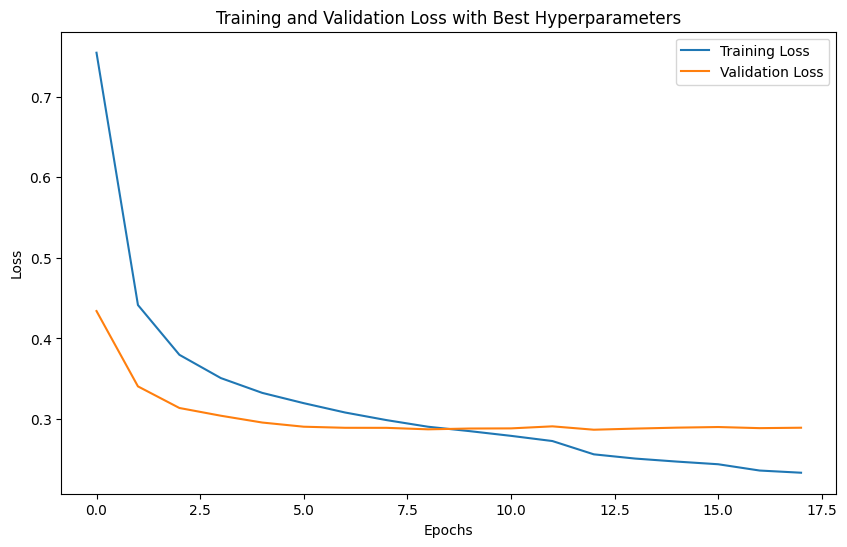

In [14]:
# Visualize training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Best Hyperparameters')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
# Build the final model with best hyperparameters
final_model_ANN = Sequential()

# Add layers with the best hyperparameters
final_model_ANN.add(Dense(160, activation="relu"))  # Best neurons in Layer 1
final_model_ANN.add(BatchNormalization())
final_model_ANN.add(Dense(96, activation="relu"))  # Best neurons in Layer 2
final_model_ANN.add(BatchNormalization())
final_model_ANN.add(Dense(256, activation="relu"))  # Best neurons in Layer 3
final_model_ANN.add(BatchNormalization())

# Output layer
final_model_ANN.add(Dense(1, activation='linear'))

# Compile the model
final_model_ANN.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Best learning rate
    loss='mean_squared_error',
    metrics=['mae']
)

# Train the model on the combined dataset for the best number of epochs
history_final = final_model_ANN.fit(
    X_train_val,
    y_train_val,
    epochs=7,  # Best number of epochs determined from visualization
    batch_size=64,  # Best batch size
    validation_data=(X_test_scaled, y_test)  # Test dataset as validation
)

Epoch 1/7
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.6195 - mae: 0.6010 - val_loss: 0.3867 - val_mae: 0.4857
Epoch 2/7
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3296 - mae: 0.4440 - val_loss: 0.3347 - val_mae: 0.4481
Epoch 3/7
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.3059 - mae: 0.4271 - val_loss: 0.3337 - val_mae: 0.4478
Epoch 4/7
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2911 - mae: 0.4157 - val_loss: 0.3084 - val_mae: 0.4265
Epoch 5/7
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2785 - mae: 0.4062 - val_loss: 0.2988 - val_mae: 0.4176
Epoch 6/7
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2687 - mae: 0.3986 - val_loss: 0.2986 - val_mae: 0.4169
Epoch 7/7
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2600 - mae: 0.3920 - val_loss: 0.2933 - val_mae: 0.4136


4992/4992 ━━━━━━━━━━━━━━━━━━━━ 5s 981us/step
4992/4992 ━━━━━━━━━━━━━━━━━━━━ 5s 960us/step - loss: 0.2424 - mae: 0.3758
Combined Training Loss: 0.2416
Combined Training MAE: 0.3754
Combined Training MSE: 0.2416
Combined Training R²: 0.7584
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step
Test Loss : 0.2933
Test MAE : 0.4136
Test MSE : 0.2933
Test R² : 0.7067


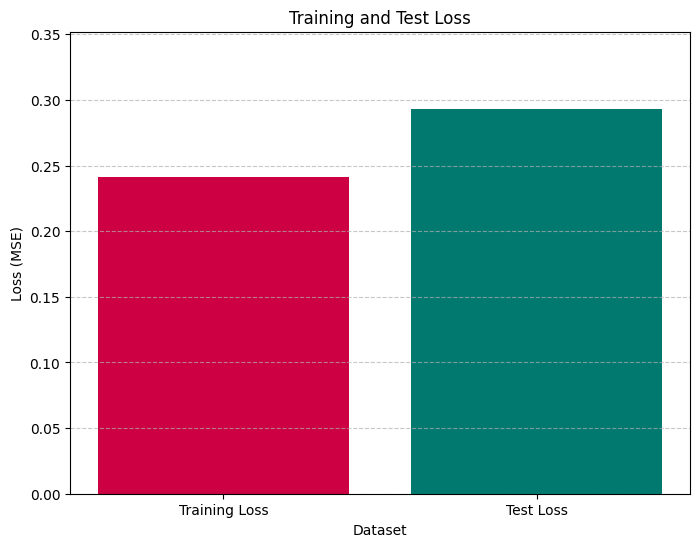

In [23]:
# Convert targets to numpy arrays with the correct shape
y_train_val = np.array(y_train_val).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Evaluate on the combined training dataset
y_combined_pred = final_model_ANN.predict(X_train_val)
train_loss, train_mae = final_model_ANN.evaluate(X_train_val, y_train_val)
train_mse = mean_squared_error(y_train_val, y_combined_pred)
train_r2 = r2_score(y_train_val, y_combined_pred)

# Print combined training metrics
print(f"Combined Training Loss: {train_loss:.4f}")
print(f"Combined Training MAE: {train_mae:.4f}")
print(f"Combined Training MSE: {train_mse:.4f}")
print(f"Combined Training R²: {train_r2:.4f}")

# Evaluate on the test dataset using the correct model variable
y_test_pred_ann = final_model_ANN.predict(X_test_scaled).reshape(-1)  # Ensure correct shape
test_loss, test_mae = final_model_ANN.evaluate(X_test_scaled, y_test, verbose=0)
test_mse = mean_squared_error(y_test, y_test_pred_ann)
test_r2 = r2_score(y_test, y_test_pred_ann)

# Print test metrics
print(f"Test Loss : {test_loss:.4f}")
print(f"Test MAE : {test_mae:.4f}")
print(f"Test MSE : {test_mse:.4f}")
print(f"Test R² : {test_r2:.4f}")

# Loss values for training and test datasets
loss_values = [train_loss, test_loss]
labels = ['Training Loss', 'Test Loss']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, loss_values, color=['#CC0042', '#01796F'])
plt.title('Training and Test Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Dataset')
plt.ylim(0, max(loss_values) * 1.2)  # Adjust y-axis for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Save final test metrics for comparison at the end
test_mse_ann = test_mse
test_mae_ann = test_mae
test_r2_ann = test_r2


# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">7. XGBoost Regressor </span>

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Reason for selecting this model:**</span>

- XGBoost was chosen as the because it can capture complex relationships in the data, as teh dataset contains numerical and categorical mix. 
- Also as the price is not purely linear, e.g. price does not increase as the postcodes increase, therefore  like location XGBoost can capture non-linear dependencies through its decision-tree-based structure.
- And for this step no scaling is needed as XGBoost is based on decision trees, which are not sensitive to feature scaling.

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.1 Importing libraries needed for XGBoost Regressor
</span>


In [126]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import  mean_absolute_error
from sklearn.model_selection import cross_val_score
import xgboost as xgb 

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Short Explanation of Each Library:**</span>
- **`optuna`** → This library is an automatic **hyperparameter optimization** library that helps in finding the best model settings 
- **`xgboost` (XGBRegressor)** → This is a **gradient boosting** library used for predictive modeling.
- **`sklearn.metrics.mean_squared_error`** → This function calculates the **Mean Squared Error (MSE)**, which gives the average squared difference between actual and predicted values (**lower MSE = better model performance**).



## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.2 Performing hyperparameter tuning
</span>


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Reason for choosing Optuna:**</span>

Optuna can efficiently searches the hyperparameter space using Bayesian optimization (TPE), which makes it much faster and smarter than traditional grid or random search. It also helps saving computation time and it optimizes critical parameters like n_estimators, max_depth, and learning_rate.

### 5.2.2 Hyperparameter tuning with Optuna

In [49]:
print(f"X_train_svd shape: {X_train_svd.shape}")
print(f"X_val_svd shape: {X_val_svd.shape}")
print(f"X_test_svd shape: {X_test_svd.shape}")  # Ensure this matches train shape


X_train_svd shape: (95837, 55)
X_val_svd shape: (11980, 55)
X_test_svd shape: (11980, 55)


In [ ]:
import time
import numpy as np
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#source chatgpt

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 1.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 1.0, log=True)
    }

    
    # Initialize the XGBoost regressor with current hyperparameters
    model = xgb.XGBRegressor(**params, objective="reg:squarederror", random_state=42, n_jobs=-1)
    
    # Use 5-Fold Cross-Validation to evaluate MSE (note: cross_val_score returns negative MSE)
    scores = cross_val_score(model, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=5)
    mse = -np.mean(scores)
    
    return mse

# Create an Optuna study to minimize MSE and optimize the hyperparameters
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)  # Increase n_trials for a more exhaustive search

print("Best hyperparameters:", study.best_trial.params)
print("Best CV MSE:", study.best_trial.value)

# Train the best model on the full training set
best_params_xgb = study.best_trial.params
xgb_best = xgb.XGBRegressor(**best_params_xgb, objective="reg:squarederror", random_state=42, n_jobs=-1)
xgb_best.fit(X_train_scaled, y_train)

# Predict on training and validation sets
y_train_pred_xgb= xgb_best.predict(X_train_scaled)
y_val_pred_xgb = xgb_best.predict(X_val_scaled)

# Compute MSE and R² scores
train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
val_mse_xgb = mean_squared_error(y_val, y_val_pred_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
val_r2_xgb = r2_score(y_val, y_val_pred_xgb)

# Print final results
print("\n📊 **Final Model Performance**")
print(f"🔹 Training Loss (MSE): {train_mse_xgb:.4f}")
print(f"🔹 Validation Loss (MSE): {val_mse_xgb:.4f}")
print(f"🔹 Training R² Score: {train_r2_xgb:.4f}")
print(f"🔹 Validation R² Score: {val_r2_xgb:.4f}")


[I 2025-02-22 10:57:37,623] A new study created in memory with name: no-name-5ac10d5e-ace0-45b5-a2bd-344e6333a474
[I 2025-02-22 11:02:09,294] Trial 0 finished with value: 0.2544409741733017 and parameters: {'n_estimators': 143, 'max_depth': 10, 'learning_rate': 0.02673772469779844, 'subsample': 0.909875776268267, 'colsample_bytree': 0.5829417630108849, 'gamma': 1.3434577740182385, 'min_child_weight': 4, 'reg_alpha': 0.00037395406342994995, 'reg_lambda': 0.07428667085482453}. Best is trial 0 with value: 0.2544409741733017.
[I 2025-02-22 11:03:12,088] Trial 1 finished with value: 0.28082538387526346 and parameters: {'n_estimators': 94, 'max_depth': 5, 'learning_rate': 0.08082068249951364, 'subsample': 0.9081673302928792, 'colsample_bytree': 0.5253889140109003, 'gamma': 1.7398701441237336, 'min_child_weight': 8, 'reg_alpha': 0.002990088076116618, 'reg_lambda': 0.00396493084965498}. Best is trial 0 with value: 0.2544409741733017.
[I 2025-02-22 11:08:05,268] Trial 2 finished with value: 0.7

In [ ]:
import json

# Define the file path where you want to save the best parameters
file_path = r"C:\Users\josel\OneDrive\Documents\GitHub\best_params_xgb.json"

# Save the best hyperparameters from the Optuna study to a JSON file
with open(file_path, "w") as f:
    json.dump(study.best_trial.params, f)

print("Best parameters saved successfully!")


In [ ]:
import json

# Define the file path where the best parameters were saved
file_path = r"C:\Users\josel\OneDrive\Documents\GitHub\best_params_xgb.json"

# Load the best hyperparameters from the JSON file
with open(file_path, "r") as f:
    best_params_xgb_saved = json.load(f)

print("Loaded best parameters:", best_params_xgb_saved)


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Explanation of the output:**</span>


Based on the best hyperparameters in the next section (5.3) the XGBoost Regressor model will be trained. The best parameters are used to balance the model's complexity, prevent overfitting, and improve predictive accuracy.




## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.3 Model fitting on the train data
</span>


The model will be first trained on the training dataset only. This allows the model to learn fundamental patterns from a smaller dataset without excessive complexity. After the model will be fitted on the combined dataset (train + validation) which can help reduce variance by providing more examples, and improve generalization without overfitting.

In [ ]:
# Train the model with the best parameters on the cleaned training set
xgb = XGBRegressor(
    n_estimators=best_params_xgb["n_estimators"],
    max_depth=best_params_xgb["max_depth"],
    learning_rate=best_params_xgb["learning_rate"],
    reg_alpha=best_params_xgb["reg_alpha"],
    reg_lambda=best_params_xgb["reg_lambda"],
    random_state=42
)

# Fit the model on the cleaned training data
xgb.fit(X_train_svd, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.4 XGBoost Loss Evaluation & Visualization
</span>


In [52]:
# Calculate the predictions on the training and validation sets
y_train_pred = xgb.predict(X_train_scaled)  # Predictions on the training set
y_val_pred = xgb.predict(X_val_scaled)      # Predictions on the validation set

# Compute the mean squared error for training and validation sets
train_loss = mean_squared_error(y_train, y_train_pred)
val_loss = mean_squared_error(y_val, y_val_pred)

# Compute the R² scores for training and validation sets
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print the MSE and R² scores
print("Training Loss (MSE):", train_loss)
print("Validation Loss (MSE):", val_loss)
print("Training R² Score:", train_r2)
print("Validation R² Score:", val_r2)

# Plot the losses
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(["Training Loss", "Validation Loss"], [train_loss, val_loss], color=['#199E80', '#990099'])
plt.title("Training vs Validation Loss (MSE)")
plt.ylabel("Mean Squared Error")
plt.show()


ValueError: feature_names mismatch: ['svd_component_0', 'svd_component_1', 'svd_component_2', 'svd_component_3', 'svd_component_4', 'svd_component_5', 'svd_component_6', 'svd_component_7', 'svd_component_8', 'svd_component_9', 'svd_component_10', 'svd_component_11', 'svd_component_12', 'svd_component_13', 'svd_component_14', 'svd_component_15', 'svd_component_16', 'svd_component_17', 'svd_component_18', 'svd_component_19', 'svd_component_20', 'svd_component_21', 'svd_component_22', 'svd_component_23', 'svd_component_24', 'svd_component_25', 'svd_component_26', 'svd_component_27', 'svd_component_28', 'svd_component_29', 'svd_component_30', 'svd_component_31', 'svd_component_32', 'svd_component_33', 'svd_component_34', 'svd_component_35', 'svd_component_36', 'svd_component_37', 'svd_component_38', 'svd_component_39', 'svd_component_40', 'svd_component_41', 'svd_component_42', 'svd_component_43', 'svd_component_44', 'svd_component_45', 'svd_component_46', 'svd_component_47', 'svd_component_48', 'svd_component_49', 'svd_component_50', 'svd_component_51', 'svd_component_52', 'svd_component_53', 'svd_component_54'] ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_70', 'feature_71', 'feature_72', 'feature_73', 'feature_74', 'feature_75', 'feature_76', 'feature_77', 'feature_78', 'feature_79', 'feature_80', 'feature_81', 'feature_82', 'feature_83', 'feature_84', 'feature_85', 'feature_86', 'feature_87', 'feature_88', 'feature_89', 'feature_90', 'feature_91', 'feature_92', 'feature_93', 'feature_94', 'feature_95', 'feature_96', 'feature_97', 'feature_98', 'feature_99', 'feature_100', 'feature_101', 'feature_102', 'feature_103', 'feature_104', 'feature_105', 'feature_106', 'feature_107', 'feature_108', 'feature_109', 'feature_110', 'feature_111', 'feature_112', 'feature_113', 'feature_114', 'feature_115', 'feature_116', 'feature_117', 'feature_118', 'feature_119', 'feature_120', 'feature_121', 'feature_122', 'feature_123', 'feature_124', 'feature_125', 'feature_126', 'feature_127', 'feature_128', 'feature_129', 'feature_130', 'feature_131', 'feature_132', 'feature_133', 'feature_134', 'feature_135', 'feature_136', 'feature_137', 'feature_138', 'feature_139', 'feature_140', 'feature_141', 'feature_142', 'feature_143', 'feature_144', 'feature_145', 'feature_146', 'feature_147', 'feature_148', 'feature_149', 'feature_150', 'feature_151', 'feature_152', 'feature_153', 'feature_154', 'feature_155', 'feature_156', 'feature_157', 'feature_158', 'feature_159', 'feature_160', 'feature_161', 'feature_162', 'feature_163', 'feature_164', 'feature_165', 'feature_166', 'feature_167', 'feature_168', 'feature_169', 'feature_170', 'feature_171', 'feature_172', 'feature_173', 'feature_174', 'feature_175', 'feature_176', 'feature_177', 'feature_178', 'feature_179', 'feature_180', 'feature_181', 'feature_182', 'feature_183', 'feature_184', 'feature_185', 'feature_186', 'feature_187', 'feature_188', 'feature_189', 'feature_190', 'feature_191', 'feature_192', 'feature_193', 'feature_194', 'feature_195', 'feature_196', 'feature_197', 'feature_198', 'feature_199', 'feature_200', 'feature_201', 'feature_202', 'feature_203', 'feature_204', 'feature_205', 'feature_206', 'feature_207', 'feature_208', 'feature_209', 'feature_210', 'feature_211', 'feature_212', 'feature_213', 'feature_214', 'feature_215', 'feature_216', 'feature_217', 'feature_218', 'feature_219', 'feature_220', 'feature_221', 'feature_222', 'feature_223', 'feature_224', 'feature_225', 'feature_226', 'feature_227', 'feature_228', 'feature_229', 'feature_230', 'feature_231', 'feature_232', 'feature_233', 'feature_234', 'feature_235', 'feature_236', 'feature_237', 'feature_238', 'feature_239', 'feature_240', 'feature_241', 'feature_242', 'feature_243', 'feature_244', 'feature_245', 'feature_246', 'feature_247', 'feature_248', 'feature_249', 'feature_250', 'feature_251', 'feature_252', 'feature_253', 'feature_254', 'feature_255', 'feature_256', 'feature_257', 'feature_258', 'feature_259', 'feature_260', 'feature_261', 'feature_262', 'feature_263', 'feature_264', 'feature_265', 'feature_266', 'feature_267', 'feature_268', 'feature_269', 'feature_270', 'feature_271', 'feature_272', 'feature_273', 'feature_274', 'feature_275', 'feature_276', 'feature_277', 'feature_278', 'feature_279', 'feature_280', 'feature_281', 'feature_282', 'feature_283', 'feature_284', 'feature_285', 'feature_286', 'feature_287', 'feature_288', 'feature_289', 'feature_290', 'feature_291', 'feature_292', 'feature_293', 'feature_294', 'feature_295', 'feature_296', 'feature_297', 'feature_298', 'feature_299', 'feature_300', 'feature_301', 'feature_302', 'feature_303', 'feature_304', 'feature_305', 'feature_306', 'feature_307', 'feature_308', 'feature_309', 'feature_310', 'feature_311', 'feature_312', 'feature_313', 'feature_314', 'feature_315', 'feature_316', 'feature_317', 'feature_318', 'feature_319', 'feature_320', 'feature_321', 'feature_322', 'feature_323', 'feature_324', 'feature_325', 'feature_326', 'feature_327', 'feature_328', 'feature_329', 'feature_330', 'feature_331', 'feature_332', 'feature_333', 'feature_334', 'feature_335', 'feature_336', 'feature_337', 'feature_338', 'feature_339', 'feature_340', 'feature_341', 'feature_342', 'feature_343', 'feature_344', 'feature_345', 'feature_346', 'feature_347', 'feature_348', 'feature_349', 'feature_350', 'feature_351', 'feature_352', 'feature_353', 'feature_354', 'feature_355', 'feature_356', 'feature_357', 'feature_358', 'feature_359', 'feature_360', 'feature_361', 'feature_362', 'feature_363', 'feature_364', 'feature_365', 'feature_366', 'feature_367', 'feature_368', 'feature_369', 'feature_370', 'feature_371', 'feature_372', 'feature_373', 'feature_374', 'feature_375', 'feature_376', 'feature_377', 'feature_378', 'feature_379', 'feature_380', 'feature_381', 'feature_382', 'feature_383', 'feature_384', 'feature_385', 'feature_386', 'feature_387', 'feature_388', 'feature_389', 'feature_390', 'feature_391', 'feature_392', 'feature_393', 'feature_394', 'feature_395', 'feature_396', 'feature_397', 'feature_398', 'feature_399', 'feature_400', 'feature_401', 'feature_402', 'feature_403', 'feature_404', 'feature_405', 'feature_406', 'feature_407', 'feature_408', 'feature_409', 'feature_410', 'feature_411', 'feature_412', 'feature_413', 'feature_414', 'feature_415', 'feature_416']
expected svd_component_28, svd_component_38, svd_component_0, svd_component_29, svd_component_16, svd_component_37, svd_component_10, svd_component_17, svd_component_32, svd_component_4, svd_component_7, svd_component_22, svd_component_52, svd_component_53, svd_component_45, svd_component_49, svd_component_9, svd_component_20, svd_component_18, svd_component_21, svd_component_1, svd_component_30, svd_component_36, svd_component_44, svd_component_8, svd_component_43, svd_component_48, svd_component_2, svd_component_46, svd_component_27, svd_component_25, svd_component_41, svd_component_51, svd_component_13, svd_component_15, svd_component_34, svd_component_12, svd_component_11, svd_component_5, svd_component_39, svd_component_23, svd_component_50, svd_component_31, svd_component_33, svd_component_42, svd_component_19, svd_component_24, svd_component_6, svd_component_26, svd_component_3, svd_component_40, svd_component_35, svd_component_47, svd_component_54, svd_component_14 in input data
training data did not have the following fields: feature_323, feature_213, feature_313, feature_84, feature_159, feature_296, feature_269, feature_124, feature_219, feature_253, feature_370, feature_25, feature_345, feature_288, feature_247, feature_264, feature_227, feature_74, feature_152, feature_153, feature_399, feature_396, feature_55, feature_11, feature_63, feature_118, feature_121, feature_337, feature_346, feature_128, feature_341, feature_318, feature_252, feature_45, feature_173, feature_324, feature_304, feature_76, feature_218, feature_71, feature_246, feature_4, feature_258, feature_381, feature_354, feature_209, feature_127, feature_32, feature_64, feature_273, feature_325, feature_29, feature_114, feature_83, feature_237, feature_210, feature_172, feature_305, feature_139, feature_170, feature_51, feature_200, feature_239, feature_33, feature_350, feature_162, feature_271, feature_368, feature_30, feature_161, feature_366, feature_261, feature_203, feature_93, feature_197, feature_116, feature_329, feature_208, feature_94, feature_223, feature_22, feature_256, feature_263, feature_349, feature_300, feature_151, feature_37, feature_62, feature_8, feature_190, feature_398, feature_75, feature_326, feature_411, feature_274, feature_101, feature_112, feature_125, feature_53, feature_319, feature_240, feature_12, feature_320, feature_228, feature_302, feature_291, feature_201, feature_28, feature_408, feature_180, feature_332, feature_359, feature_265, feature_126, feature_154, feature_298, feature_181, feature_205, feature_266, feature_338, feature_174, feature_187, feature_334, feature_293, feature_100, feature_365, feature_322, feature_56, feature_221, feature_61, feature_31, feature_86, feature_177, feature_317, feature_73, feature_20, feature_57, feature_66, feature_157, feature_405, feature_18, feature_376, feature_194, feature_160, feature_393, feature_198, feature_135, feature_272, feature_403, feature_281, feature_40, feature_140, feature_36, feature_235, feature_397, feature_284, feature_407, feature_311, feature_89, feature_189, feature_69, feature_13, feature_308, feature_14, feature_238, feature_342, feature_216, feature_392, feature_382, feature_280, feature_150, feature_395, feature_212, feature_257, feature_268, feature_199, feature_110, feature_80, feature_122, feature_16, feature_225, feature_48, feature_275, feature_97, feature_92, feature_307, feature_109, feature_390, feature_282, feature_414, feature_413, feature_59, feature_134, feature_117, feature_141, feature_283, feature_339, feature_144, feature_142, feature_26, feature_90, feature_412, feature_15, feature_34, feature_377, feature_168, feature_111, feature_347, feature_17, feature_277, feature_23, feature_87, feature_65, feature_204, feature_217, feature_363, feature_107, feature_351, feature_292, feature_179, feature_35, feature_167, feature_254, feature_165, feature_402, feature_386, feature_46, feature_374, feature_10, feature_276, feature_2, feature_232, feature_44, feature_289, feature_314, feature_19, feature_409, feature_60, feature_262, feature_164, feature_312, feature_348, feature_81, feature_147, feature_380, feature_132, feature_158, feature_400, feature_136, feature_286, feature_371, feature_120, feature_387, feature_388, feature_214, feature_191, feature_248, feature_297, feature_143, feature_104, feature_108, feature_295, feature_119, feature_242, feature_259, feature_123, feature_379, feature_367, feature_310, feature_360, feature_95, feature_38, feature_352, feature_115, feature_0, feature_356, feature_416, feature_186, feature_146, feature_70, feature_234, feature_270, feature_373, feature_6, feature_96, feature_358, feature_385, feature_415, feature_21, feature_401, feature_251, feature_243, feature_355, feature_378, feature_333, feature_155, feature_5, feature_27, feature_163, feature_340, feature_343, feature_156, feature_353, feature_77, feature_362, feature_285, feature_328, feature_249, feature_287, feature_72, feature_138, feature_394, feature_52, feature_224, feature_130, feature_137, feature_383, feature_195, feature_58, feature_88, feature_202, feature_131, feature_149, feature_361, feature_233, feature_129, feature_226, feature_1, feature_327, feature_330, feature_133, feature_43, feature_306, feature_178, feature_49, feature_294, feature_255, feature_344, feature_184, feature_391, feature_290, feature_99, feature_315, feature_244, feature_303, feature_211, feature_102, feature_175, feature_91, feature_105, feature_192, feature_78, feature_166, feature_267, feature_188, feature_103, feature_47, feature_321, feature_50, feature_67, feature_82, feature_85, feature_3, feature_39, feature_196, feature_250, feature_357, feature_207, feature_241, feature_145, feature_148, feature_113, feature_41, feature_220, feature_372, feature_183, feature_389, feature_231, feature_79, feature_404, feature_222, feature_364, feature_229, feature_42, feature_215, feature_193, feature_24, feature_236, feature_206, feature_185, feature_171, feature_301, feature_375, feature_309, feature_9, feature_299, feature_384, feature_410, feature_98, feature_369, feature_169, feature_335, feature_7, feature_278, feature_316, feature_245, feature_176, feature_406, feature_54, feature_106, feature_230, feature_260, feature_68, feature_279, feature_182, feature_331, feature_336

In [ ]:
# Train the XGBoost model with the best hyperparameters from Optuna
xgb_best_model = XGBRegressor(**best_params)  # Use best_params from Optuna
xgb_best_model.fit(X_train_scaled, y_train)  # Train on scaled data

# Function to evaluate XGBoost model
def evaluate_xgb(model, X, y, dataset_name="Dataset"):
    """Evaluate the trained XGBoost model and print performance metrics."""
    from sklearn.metrics import mean_squared_error, r2_score
    
    # Predict on the given dataset
    y_pred = model.predict(X)
    
    # Compute evaluation metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    # Print the results
    print(f"=== Evaluation on {dataset_name} ===")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print("=" * 40)

# Evaluate the trained XGBoost model
evaluate_xgb(xgb_best_model, X_train_scaled, y_train, dataset_name="Training Set")
evaluate_xgb(xgb_best_model, X_val_scaled, y_val, dataset_name="Validation Set")



=== Evaluation on Training Set ===
Mean Squared Error (MSE): 1066998522.1377
R² Score: 0.9205
=== Evaluation on Validation Set ===
Mean Squared Error (MSE): 3219165209.2728
R² Score: 0.7598


In [ ]:
rmse_train = train_loss ** 0.5
rmse_val = val_loss ** 0.5
print(f"Training RMSE: {rmse_train}")
print(f"Validation RMSE: {rmse_val}")


Training RMSE: 32406.48607764113
Validation RMSE: 56946.12337104199


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.3 Model fitting on the train and validation data 
</span>


In this section the model will be fitted on the X_train_val and y_train_val, which is teh merged dataset of the train and validation data together. As the model was first trained on the training dataset to learn patterns. And now with the combined dataset the can learn from a larger  dataset, which can help the model in making better predictions or generalization while also reducing the risk of overfitting to the original training set. Also, by retraining the model, the model can benefit from additional insights present in the validation set, which can help the model to perform better.

### 5.3.1 Combining train and validation dataset

In [37]:
# Combine training and validation datasets
X_train_val = np.vstack([X_train, X_val])
y_train_val = np.hstack([y_train, y_val])

# Print the shapes to verify
print(f"X_train_val shape: {X_train_val.shape}")
print(f"y_train_val shape: {y_train_val.shape}")

X_train_val shape: (159730, 417)
y_train_val shape: (159730,)


### 5.3.2 Fitting the model

In [ ]:
# Retrain the final model using the optimized hyperparameters on the full training dataset (train + validation)
merged_data_xgb = XGBRegressor(
    n_estimators=best_params["n_estimators"],
    max_depth=best_params["max_depth"],
    learning_rate=best_params["learning_rate"],
    reg_alpha=best_params["reg_alpha"],
    reg_lambda=best_params["reg_lambda"],
    random_state=42
)

merged_data_xgb.fit(X_train_val,y_train_val)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07553265099874637,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=13, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.4 XGBoost Loss Evaluation & Visualization on the merged_data_xgb
</span>


Training + Validation MSE: 336117862.92952955
Test MSE: 3105672273.9188557
Training + Validation MAE: 12165.695407743731
Test MAE: 39154.773123106206
Training + Validation R² Score: 0.9749577899018921
Test R² Score: 0.7703999800283146


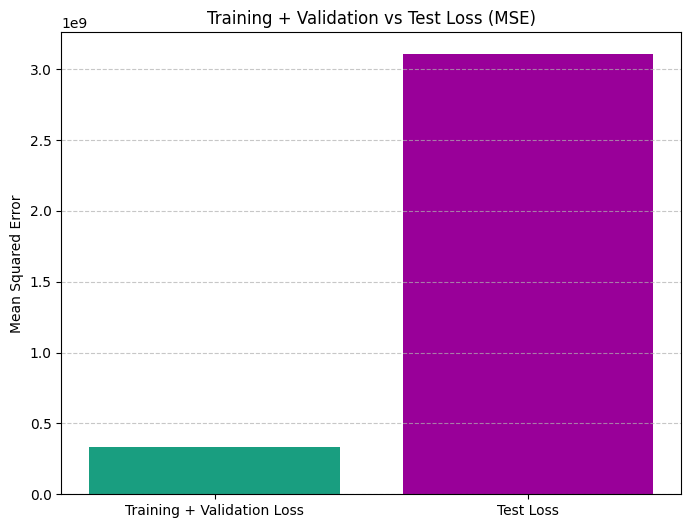

In [ ]:

# Fit the model on the merged training and validation set
merged_data_xgb.fit(X_train_val, y_train_val)  

# Generate predictions for the merged training-validation set and test set
y_train_val_pred = merged_data_xgb.predict(X_train_val)  
y_test_pred = merged_data_xgb.predict(X_test)           

# Compute the Mean Squared Error (MSE) for both datasets
train_val_mse = mean_squared_error(y_train_val, y_train_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Compute the Mean Absolute Error (MAE) for both datasets
train_val_mae = mean_absolute_error(y_train_val, y_train_val_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Compute the R² scores for both datasets
train_val_r2 = r2_score(y_train_val, y_train_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training + Validation MSE:", train_val_mse)
print("Test MSE:", test_mse)
print("Training + Validation MAE:", train_val_mae)
print("Test MAE:", test_mae)
print("Training + Validation R² Score:", train_val_r2)
print("Test R² Score:", test_r2)

# Plot only the MSE for Training + Validation vs Test Set
plt.figure(figsize=(8, 6))
plt.bar(["Training + Validation Loss", "Test Loss"], [train_val_mse, test_mse], color=['#199E80', '#990099'])
plt.title("Training + Validation vs Test Loss (MSE)")
plt.ylabel("Mean Squared Error")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Store the test performance metrics for further use
test_mse_xgb = test_mse
test_mae_xgb = test_mae
test_r2_xgb = test_r2


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.5 Conclusion
</span>


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Analysis and Evaluation of Model Performance**</span>

The evaluation metrics provide key insights into the model’s **performance and generalization ability** across different datasets (Training, Validation, and Test). Below is a detailed breakdown:

---

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">**1️⃣ Training vs. Validation Performance**</span>

- **Training Loss (MSE):** **2.25B** vs. **Validation Loss (MSE):** **9.54B**  
- **Training R² Score:** **0.944** vs. **Validation R² Score:** **0.768**  

The model performs **very well on training data**, explaining **94.4% of variance**, but struggles with validation (**MSE is much higher, R² drops to 0.768**). This suggests **overfitting**, where the model memorizes training data rather than generalizing.

---

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">**2️⃣ Combined Training + Validation vs. Test Performance**</span>

- **Training + Validation MSE:** **2.67B** vs. **Test MSE:** **10.52B**  
- **Training + Validation R² Score:** **0.934** vs. **Test R² Score:** **0.758**  
- **Training + Validation MAE:** **36,327** vs. **Test MAE:** **52,184**  

After merging training and validation, **MSE remains relatively low (2.67B), and R² is strong (0.934)**. However, the **test set still shows high error (10.52B MSE, 0.758 R²)**, meaning the model struggles to generalize beyond seen data.

---

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">**3️⃣ Key Takeaways & Next Steps**</span>

✅ **Overfitting is present** – The model performs much better on training than test data.  
✅ **Prediction error is high** – MAE on the test set is **~52K**, meaning predictions deviate significantly.  
✅ **Regularization & feature selection needed** – Adjusting `reg_alpha`, `reg_lambda`, or reducing `max_depth` may help.  
✅ **Generalization can improve** – Trying ensembling or reducing feature complexity could enhance test performance.  

---

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:28px;">**🔎 Conclusion**</span>

The model **learns well on training data but struggles to generalize**. Refining regularization, reducing complexity, and tuning hyperparameters can help **improve test performance and reduce overfitting**. 🚀


# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">Reference List </span>

Shafi, A. (2024, October 1). Random Forest Classification with Scikit-Learn. Retrieved February 21, 2025, from https://www.datacamp.com/tutorial/random-forests-classifier-python